<a href="https://colab.research.google.com/github/tamaratsilva/biblioteca_pandas/blob/main/Case2_Varejo_Passo_a_passo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

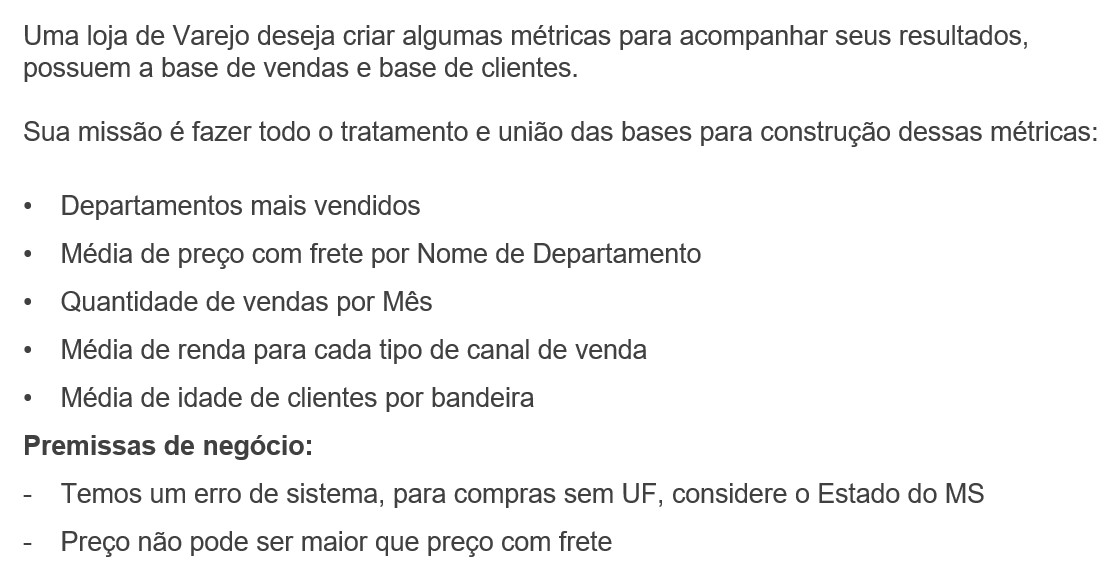

In [8]:
import pandas as pd
import seaborn as sns

In [11]:
vendas = pd.read_excel('/content/varejo.xlsx')
vendas.head()

,idcompra,idcanalvenda,bandeira,Data,Preço,Preço_com_frete,Nome_Departamento,estado,cliente_Log
0,393835,Mobile,A,2023-03-05,1582.560,791.280,Telefones e Celulares,SP,15042
1,411885,Mobile,A,2023-03-17,679.200,679.200,Tablets,SP,17590
2,437305,Mobile,A,2023-03-06,35.920,37.512,Bebes,SP,15478
3,440055,APP,A,2023-01-13,2239.416,2239.416,TVs e Acessorios,SP,2933
4,455795,Mobile,B,2023-03-31,1743.200,1785.112,Esporte e Lazer,RS,19790


In [12]:
vendas.info ()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 80228 entries, 0 to 80227
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   idcompra           80228 non-null  int64         
 1   idcanalvenda       80228 non-null  object        
 2   bandeira           80228 non-null  object        
 3   Data               80228 non-null  datetime64[ns]
 4   Preço              79926 non-null  float64       
 5   Preço_com_frete    80228 non-null  float64       
 6   Nome_Departamento  80228 non-null  object        
 7   estado             79926 non-null  object        
 8   cliente_Log        80228 non-null  int64         
dtypes: datetime64[ns](1), float64(2), int64(2), object(4)
memory usage: 5.5+ MB


In [13]:
#QUANTAS LINHAS TEMOS PARA UMA DETERMINADA CATEGORIA
#com isso consegui identif que APP = APLICATIVO,logo preciso realizar a substituição da palavra
vendas.groupby("idcanalvenda").idcompra.nunique()

,idcompra
idcanalvenda,
APP,139
Aplicativo,21425
Internet,24515
Mobile,24732


In [14]:
#SUBSTITUIÇÃO
vendas["idcanalvenda"]= vendas["idcanalvenda"].str.replace("APP","Aplicativo")
vendas.groupby("idcanalvenda").idcompra.nunique()

,idcompra
idcanalvenda,
Aplicativo,21539
Internet,24515
Mobile,24732


In [15]:
vendas.groupby("bandeira").idcompra.nunique()

,idcompra
bandeira,
A,27679
B,38483


In [16]:
vendas.groupby("Nome_Departamento").idcompra.nunique()


,idcompra
Nome_Departamento,
Acessorios e Inovacoes,3548
Alimentos,2
Ar e Ventilacao,951
Audio,1794
Automotivo,895
Bebes,4531
Beleza e Saude,4626
Brinquedos,1320
"Cama, Mesa e Banho",153


In [17]:
vendas.groupby("estado").idcompra.nunique()

,idcompra
estado,
AC,10
AL,461
AM,15
AP,3
BA,2028
CE,1007
DF,1902
ES,1254
GO,1603


In [18]:
vendas["Nome_Departamento"]= vendas["Nome_Departamento"].str.replace(" ","_")
vendas.groupby("Nome_Departamento").idcompra.nunique()

,idcompra
Nome_Departamento,
Acessorios_e_Inovacoes,3548
Alimentos,2
Ar_e_Ventilacao,951
Audio,1794
Automotivo,895
Bebes,4531
Beleza_e_Saude,4626
Brinquedos,1320
"Cama,_Mesa_e_Banho",153


In [19]:
#IDENTIFICANDO OS VALORES NULOS
vendas[vendas["estado"].isnull()]
#A VARIAS MANEIRAS EM TRATAR: ELIMINAR (DROPAR) AS LINHAS QUE CONTENHA VALOR NULO OU REALIZAR AS MODIFICAÇÕES DE ACORDO COM AS PREMISSAS

,idcompra,idcanalvenda,bandeira,Data,Preço,Preço_com_frete,Nome_Departamento,estado,cliente_Log
96,382380,Internet,A,2023-04-26,NaN,879.200,Telefones_e_Celulares,NaN,5804
284,346055,Internet,A,2023-03-23,NaN,87.648,Ar_e_Ventilacao,NaN,16359
402,172555,Mobile,A,2023-03-19,NaN,135.840,Ar_e_Ventilacao,NaN,13691
411,446380,Mobile,A,2023-03-09,NaN,1703.120,Eletrodomesticos,NaN,13024
770,40425,Mobile,B,2023-04-21,NaN,1759.200,Telefones_e_Celulares,NaN,9121
...,...,...,...,...,...,...,...,...,...
78610,399680,Aplicativo,A,2023-04-19,NaN,339.912,Eletroportateis,NaN,20873
78718,320895,Mobile,B,2023-01-20,NaN,1000.800,Telefones_e_Celulares,NaN,17772
79465,389240,Aplicativo,A,2023-01-14,NaN,279.200,Eletrodomesticos,NaN,20399
79548,124585,Mobile,A,2023-04-21,NaN,2051.240,TVs_e_Acessorios,NaN,17784


In [20]:
#ELIMITANDO (DROPANDO) AS LINHAS COM VALORES NULO (dropna)
vendas_sem_nulos = vendas.dropna()
vendas_sem_nulos.info()

<class 'pandas.core.frame.DataFrame'>
Index: 79926 entries, 0 to 80227
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   idcompra           79926 non-null  int64         
 1   idcanalvenda       79926 non-null  object        
 2   bandeira           79926 non-null  object        
 3   Data               79926 non-null  datetime64[ns]
 4   Preço              79926 non-null  float64       
 5   Preço_com_frete    79926 non-null  float64       
 6   Nome_Departamento  79926 non-null  object        
 7   estado             79926 non-null  object        
 8   cliente_Log        79926 non-null  int64         
dtypes: datetime64[ns](1), float64(2), int64(2), object(4)
memory usage: 6.1+ MB


In [21]:
#NESTE CASE A PREMISSA É "COMPRAS COM UF NULO, CONSIDERAR O ESTADO DO MS",LOGO SUBSTITUIR O NULO DO ESTADO POR MS
vendas["estado"].fillna("MS", inplace=True)
vendas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 80228 entries, 0 to 80227
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   idcompra           80228 non-null  int64         
 1   idcanalvenda       80228 non-null  object        
 2   bandeira           80228 non-null  object        
 3   Data               80228 non-null  datetime64[ns]
 4   Preço              79926 non-null  float64       
 5   Preço_com_frete    80228 non-null  float64       
 6   Nome_Departamento  80228 non-null  object        
 7   estado             80228 non-null  object        
 8   cliente_Log        80228 non-null  int64         
dtypes: datetime64[ns](1), float64(2), int64(2), object(4)
memory usage: 5.5+ MB


<ipython-input-21-f98673c7f9ba>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  vendas["estado"].fillna("MS", inplace=True)


In [32]:
 #decidimos substituir os valores nulos da couna preço pelo preço médio (poderia ser mediana ou outrasl lógicas)
media_preco= vendas ['Preço'].mean()
vendas ['Preço'].fillna(media_preco, inplace=True)
vendas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 80228 entries, 0 to 80227
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   idcompra           80228 non-null  int64         
 1   idcanalvenda       80228 non-null  object        
 2   bandeira           80228 non-null  object        
 3   Data               80228 non-null  datetime64[ns]
 4   Preço              80228 non-null  float64       
 5   Preço_com_frete    80228 non-null  float64       
 6   Nome_Departamento  80228 non-null  object        
 7   estado             80228 non-null  object        
 8   cliente_Log        80228 non-null  int64         
dtypes: datetime64[ns](1), float64(2), int64(2), object(4)
memory usage: 5.5+ MB


<ipython-input-32-1b98a5fe5bf0>:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  vendas ['Preço'].fillna(media_preco, inplace=True)


In [23]:
#INICIAMOS AQUI A EXPLORAR OS DADOS, APÓS FINALIZAR O TRATAMENTOS REALIZADOS ACIMA
vendas.head()

,idcompra,idcanalvenda,bandeira,Data,Preço,Preço_com_frete,Nome_Departamento,estado,cliente_Log
0,393835,Mobile,A,2023-03-05,1582.560,791.280,Telefones_e_Celulares,SP,15042
1,411885,Mobile,A,2023-03-17,679.200,679.200,Tablets,SP,17590
2,437305,Mobile,A,2023-03-06,35.920,37.512,Bebes,SP,15478
3,440055,Aplicativo,A,2023-01-13,2239.416,2239.416,TVs_e_Acessorios,SP,2933
4,455795,Mobile,B,2023-03-31,1743.200,1785.112,Esporte_e_Lazer,RS,19790


In [24]:
vendas.describe()

,idcompra,Data,Preço,Preço_com_frete,cliente_Log
count,80228.000000,80228,80228.000000,80228.000000,80228.000000
mean,251001.882448,2023-03-02 02:53:27.458742528,906.589129,908.619823,13935.464676
min,0.000000,2023-01-02 00:00:00,6.320000,6.320000,1.000000
25%,126835.000000,2023-02-01 00:00:00,147.920000,150.706000,6920.750000
50%,251760.000000,2023-03-02 00:00:00,532.448000,535.120000,13938.000000
75%,375925.000000,2023-04-01 00:00:00,1199.200000,1215.240000,20918.000000
max,723410.000000,2023-04-30 00:00:00,14439.240000,14439.240000,27982.000000
std,144272.920296,NaN,1057.611490,1057.583101,8065.215581


In [35]:
#NA PREMISSA O PREÇO NÃO PODE SER MAIOR QUE O PREÇO COM FRETE.
#no describe acima vimos que na média já evidencia isso, LOGO, precisamos pensar numa solução com mais sentido
#(CONSTRUIR UMA NOVA BASE ONDE EU SELECIONO SOMENTE AS LINHAS QUE TEM O PREÇO COM FRETE MENOR QUE O PREÇO ou CRIAR UMA REGRA QUE ELIMITE A LINHA QDO FOR MAIOR )

preco_errado = vendas.query ("Preço > Preço_com_frete")

vendas_correto = vendas.query("Preço < Preço_com_frete")


In [36]:
vendas_correto.describe()

,idcompra,Data,Preço,Preço_com_frete,cliente_Log
count,22047.000000,22047,22047.000000,22047.000000,22047.000000
mean,253799.955550,2023-03-02 05:19:31.261395968,549.518401,567.332688,13856.313013
min,25.000000,2023-01-02 00:00:00,8.720000,9.512000,1.000000
25%,127670.000000,2023-02-01 00:00:00,93.528000,100.800000,6858.000000
50%,257885.000000,2023-03-02 00:00:00,183.200000,193.912000,13845.000000
75%,379705.000000,2023-04-01 00:00:00,661.680000,676.736000,20801.000000
max,499960.000000,2023-04-30 00:00:00,14391.200000,14407.120000,27982.000000
std,144794.628563,NaN,846.295127,863.458763,8049.120135


In [38]:
vendas_correto.head()

,idcompra,idcanalvenda,bandeira,Data,Preço,Preço_com_frete,Nome_Departamento,estado,cliente_Log
2,437305,Mobile,A,2023-03-06,35.92,37.512,Bebes,SP,15478
4,455795,Mobile,B,2023-03-31,1743.20,1785.112,Esporte_e_Lazer,RS,19790
8,75525,Mobile,B,2023-02-19,679.20,695.120,Moveis,SP,3442
19,258580,Mobile,A,2023-03-27,107.76,109.344,Bebes,ES,7662
22,306675,Mobile,B,2023-02-17,471.20,511.120,Eletrodomesticos,RJ,15060


In [39]:
#departamentos mais vendidos
vendas_correto.groupby("Nome_Departamento").idcompra.nunique().sort_values(ascending=False)

,idcompra
Nome_Departamento,
Bebes,4353
Eletrodomesticos,4201
Eletroportateis,2223
Moveis,2036
Utilidades_Domesticas,1366
Acessorios_e_Inovacoes,1243
Beleza_e_Saude,1054
Brinquedos,686
Perfumaria,563


In [41]:
#MÉDIA DE PREÇO COM FRETE POR NOME DE DEPARTAMENTO
vendas_correto.groupby("Nome_Departamento")["Preço_com_frete"].agg("mean").sort_values(ascending=False)

,Preço_com_frete
Nome_Departamento,
TVs_e_Acessorios,3469.378177
Informatica,2159.782620
Linha_Industrial,2027.106667
Cine_e_Foto,1851.198000
Telefones_e_Celulares,1442.185907
Eletrodomesticos,1400.662596
Esporte_e_Lazer,1123.139383
Tablets,1100.233625
Games,942.895360


In [42]:
#MÉDIA DE PREÇO COM FRETE POR NOME DE DEPARTAMENTO
round(vendas_correto.groupby("Nome_Departamento")["Preço_com_frete"].agg("mean").sort_values(ascending=False),2)

,Preço_com_frete
Nome_Departamento,
TVs_e_Acessorios,3469.38
Informatica,2159.78
Linha_Industrial,2027.11
Cine_e_Foto,1851.20
Telefones_e_Celulares,1442.19
Eletrodomesticos,1400.66
Esporte_e_Lazer,1123.14
Tablets,1100.23
Games,942.90


In [43]:
#QTD DE VENDAS POR DATA
vendas_correto.groupby("Data").idcompra.nunique().sort_values(ascending=False)

,idcompra
Data,
2023-02-13,226
2023-01-20,218
2023-03-07,215
2023-03-30,214
2023-02-20,214
...,...
2023-02-15,162
2023-04-04,162
2023-02-25,161


In [46]:
#QTD DE VENDAS POR MÊS - CRIAR UMA COLUNA NO DATASET QUE EXTRAIA O MÊS
vendas_correto ["Mes"] = vendas_correto["Data"].dt.month
vendas_correto.head()

<ipython-input-46-03feec9d0fed>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  vendas_correto ["Mes"] = vendas_correto["Data"].dt.month


,idcompra,idcanalvenda,bandeira,Data,Preço,Preço_com_frete,Nome_Departamento,estado,cliente_Log,Mes
2,437305,Mobile,A,2023-03-06,35.92,37.512,Bebes,SP,15478,3
4,455795,Mobile,B,2023-03-31,1743.20,1785.112,Esporte_e_Lazer,RS,19790,3
8,75525,Mobile,B,2023-02-19,679.20,695.120,Moveis,SP,3442,2
19,258580,Mobile,A,2023-03-27,107.76,109.344,Bebes,ES,7662,3
22,306675,Mobile,B,2023-02-17,471.20,511.120,Eletrodomesticos,RJ,15060,2


In [47]:
#QTD DE VENDAS POR DATA
vendas_correto.groupby("Mes").idcompra.nunique().sort_values(ascending=False)

,idcompra
Mes,
3,5590
4,5454
1,5309
2,5138


In [55]:
#media de renda para cada tipo de canal venda
#VAMOS UTILIZAR OUTRA BASE DE DADOS
cliente = pd.read_excel("cliente_varejo.xlsx")
cliente.head()

,cliente_Log,idade,renda
0,15042,89,11337
1,17590,54,2050
2,15478,47,8258
3,2933,39,4671
4,19790,26,9207


In [56]:
vendas_correto.head()

,idcompra,idcanalvenda,bandeira,Data,Preço,Preço_com_frete,Nome_Departamento,estado,cliente_Log,Mes
2,437305,Mobile,A,2023-03-06,35.92,37.512,Bebes,SP,15478,3
4,455795,Mobile,B,2023-03-31,1743.20,1785.112,Esporte_e_Lazer,RS,19790,3
8,75525,Mobile,B,2023-02-19,679.20,695.120,Moveis,SP,3442,2
19,258580,Mobile,A,2023-03-27,107.76,109.344,Bebes,ES,7662,3
22,306675,Mobile,B,2023-02-17,471.20,511.120,Eletrodomesticos,RJ,15060,2


In [57]:
cliente.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26425 entries, 0 to 26424
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   cliente_Log  26425 non-null  int64
 1   idade        26425 non-null  int64
 2   renda        26425 non-null  int64
dtypes: int64(3)
memory usage: 619.5 KB


In [58]:
cliente = cliente.astype({"renda":"float"})
cliente.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26425 entries, 0 to 26424
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   cliente_Log  26425 non-null  int64  
 1   idade        26425 non-null  int64  
 2   renda        26425 non-null  float64
dtypes: float64(1), int64(2)
memory usage: 619.5 KB


In [62]:
#FAZER A JUNÇÃO -MERGE- DAS PLANILHAS PELO IDCOMPRA (ITEM EM COMUM EM AMBAS)
vendas_cliente = vendas_correto.merge(cliente, how= "left", on= "cliente_Log")
vendas_cliente.head()

,idcompra,idcanalvenda,bandeira,Data,Preço,Preço_com_frete,Nome_Departamento,estado,cliente_Log,Mes,idade,renda
0,437305,Mobile,A,2023-03-06,35.92,37.512,Bebes,SP,15478,3,47,8258.0
1,455795,Mobile,B,2023-03-31,1743.20,1785.112,Esporte_e_Lazer,RS,19790,3,26,9207.0
2,455795,Mobile,B,2023-03-31,1743.20,1785.112,Esporte_e_Lazer,RS,19790,3,58,9204.0
3,455795,Mobile,B,2023-03-31,1743.20,1785.112,Esporte_e_Lazer,RS,19790,3,48,2796.0
4,75525,Mobile,B,2023-02-19,679.20,695.120,Moveis,SP,3442,2,78,6596.0


In [63]:
#media de renda para cada tipo de canal venda
agg_idcanal_renda = round(vendas_cliente.groupby("idcanalvenda")["renda"].agg("mean").sort_values(ascending=False).reset_index(),2)
agg_idcanal_renda

,idcanalvenda,renda
0,Aplicativo,8244.85
1,Mobile,8222.72
2,Internet,8211.84


In [66]:
#media de renda para cada bandeira
agg_idade_bandeira = round(vendas_cliente.groupby("bandeira")["idade"].agg("mean").sort_values(ascending=False).reset_index(),2)
agg_idade_bandeira

,bandeira,idade
0,A,53.30
1,B,53.29


In [64]:
#AGORA VAMOS VER AS VISUALIZAÇÕES EM GRAFICOS
import matplotlib.pyplot as plt

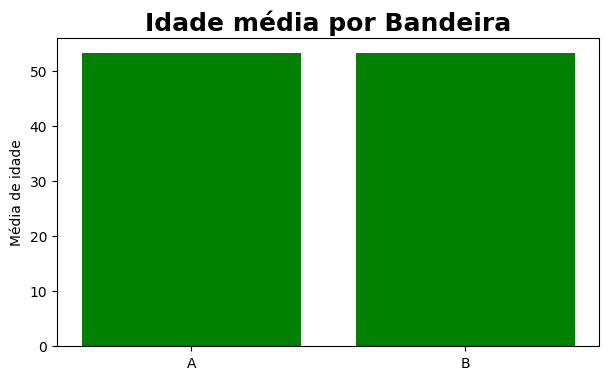

In [67]:
#idade média por BANDEIRA
fig = plt.figure(figsize=(7,4))

plt.bar(agg_idade_bandeira["bandeira"], agg_idade_bandeira["idade"], color="green")

plt.ylabel("Média de idade")

plt.title("Idade média por Bandeira", loc="center", fontsize=18, fontweight="bold", color= "black");

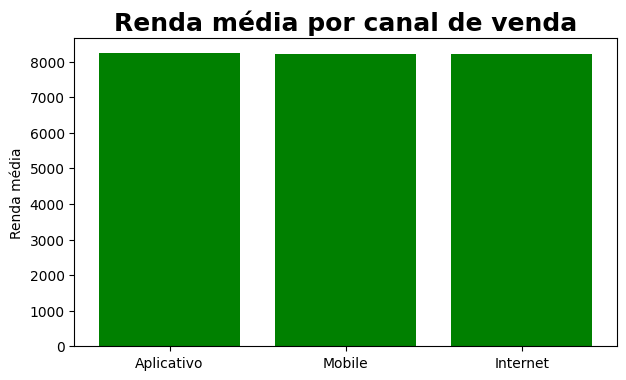

In [68]:
#RENDA MÉDIA POR CANAL DE VENDA
fig = plt.figure(figsize=(7,4))

plt.bar(agg_idcanal_renda["idcanalvenda"], agg_idcanal_renda["renda"], color="green")

plt.ylabel("Renda média")

plt.title("Renda média por canal de venda", loc="center", fontsize=18, fontweight="bold", color="black");


In [69]:
venda_por_data = vendas_correto.groupby("Data").idcompra.nunique().reset_index()
venda_por_data

,Data,idcompra
0,2023-01-02,193
1,2023-01-03,163
2,2023-01-04,188
3,2023-01-05,204
4,2023-01-06,198
...,...,...
114,2023-04-26,200
115,2023-04-27,212
116,2023-04-28,192
117,2023-04-29,187


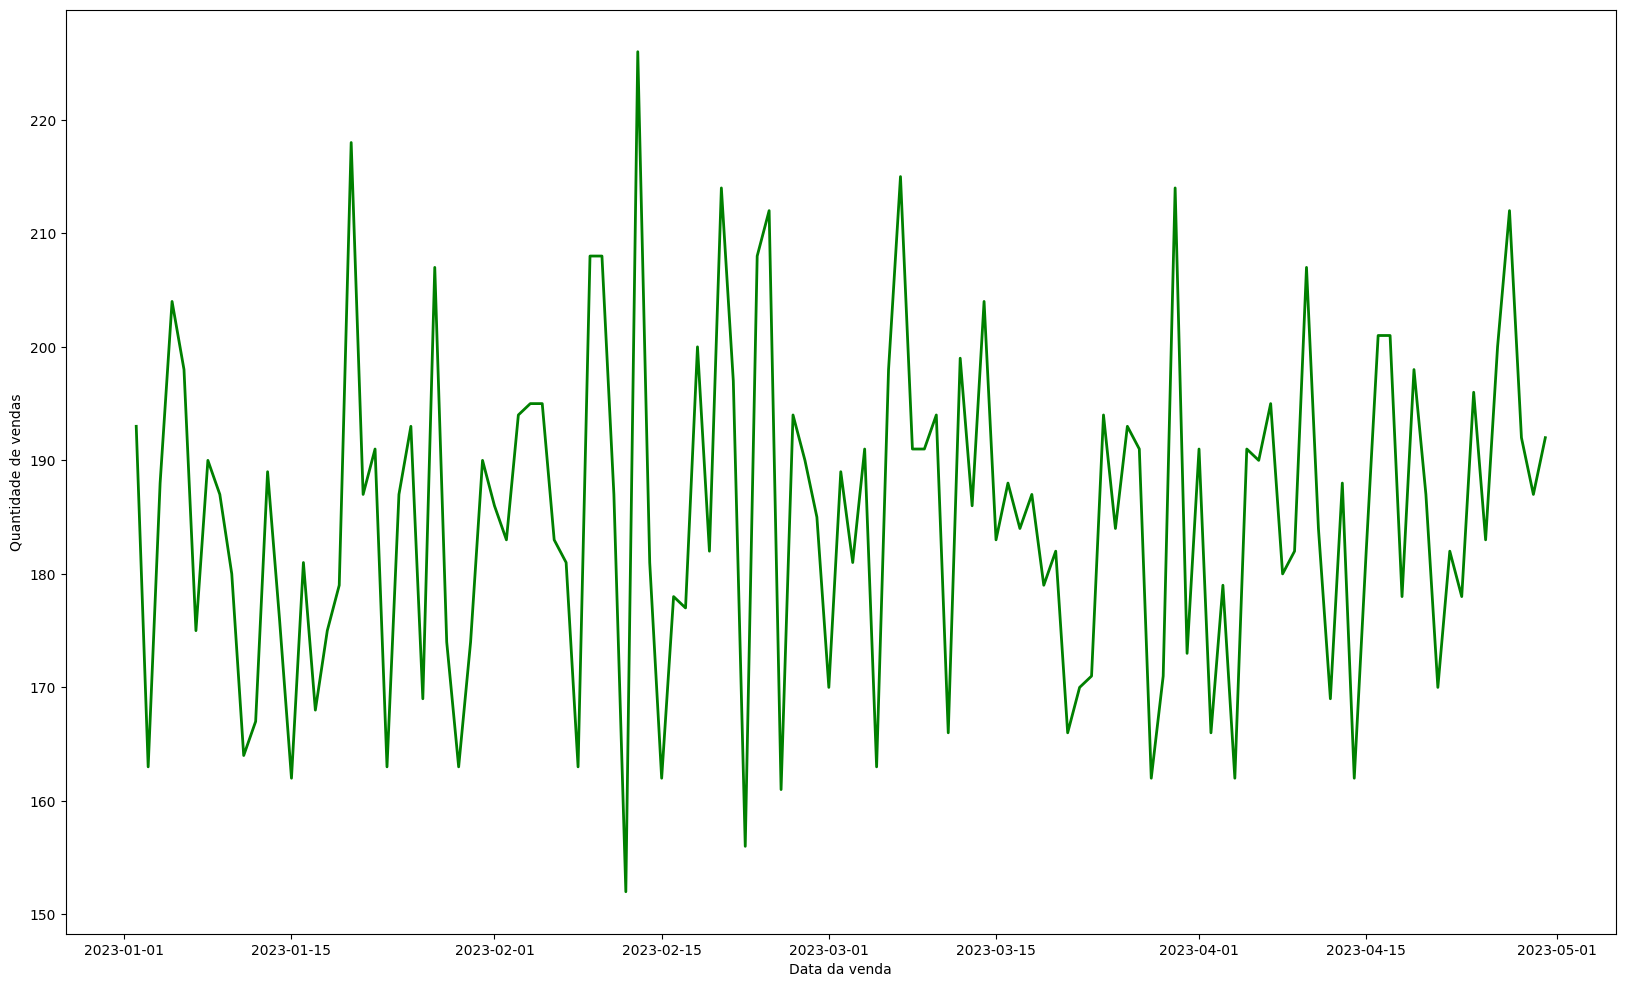

In [70]:
fig = plt.figure(figsize=(20,12))


plt.xlabel("Data da venda")
plt.ylabel("Quantidade de vendas")
x = venda_por_data["Data"]
y = venda_por_data["idcompra"]

plt.plot(x,y, color = "green", linewidth = "2")
plt.show()

In [71]:
agg_dept_preco = round(vendas_correto.groupby("Nome_Departamento")["Preço_com_frete"].agg("mean").sort_values(ascending=False).reset_index(),2)
agg_dept_preco

,Nome_Departamento,Preço_com_frete
0,TVs_e_Acessorios,3469.38
1,Informatica,2159.78
2,Linha_Industrial,2027.11
3,Cine_e_Foto,1851.20
4,Telefones_e_Celulares,1442.19
5,Eletrodomesticos,1400.66
6,Esporte_e_Lazer,1123.14
7,Tablets,1100.23
8,Games,942.90
9,Instrumentos_Musicais,834.61


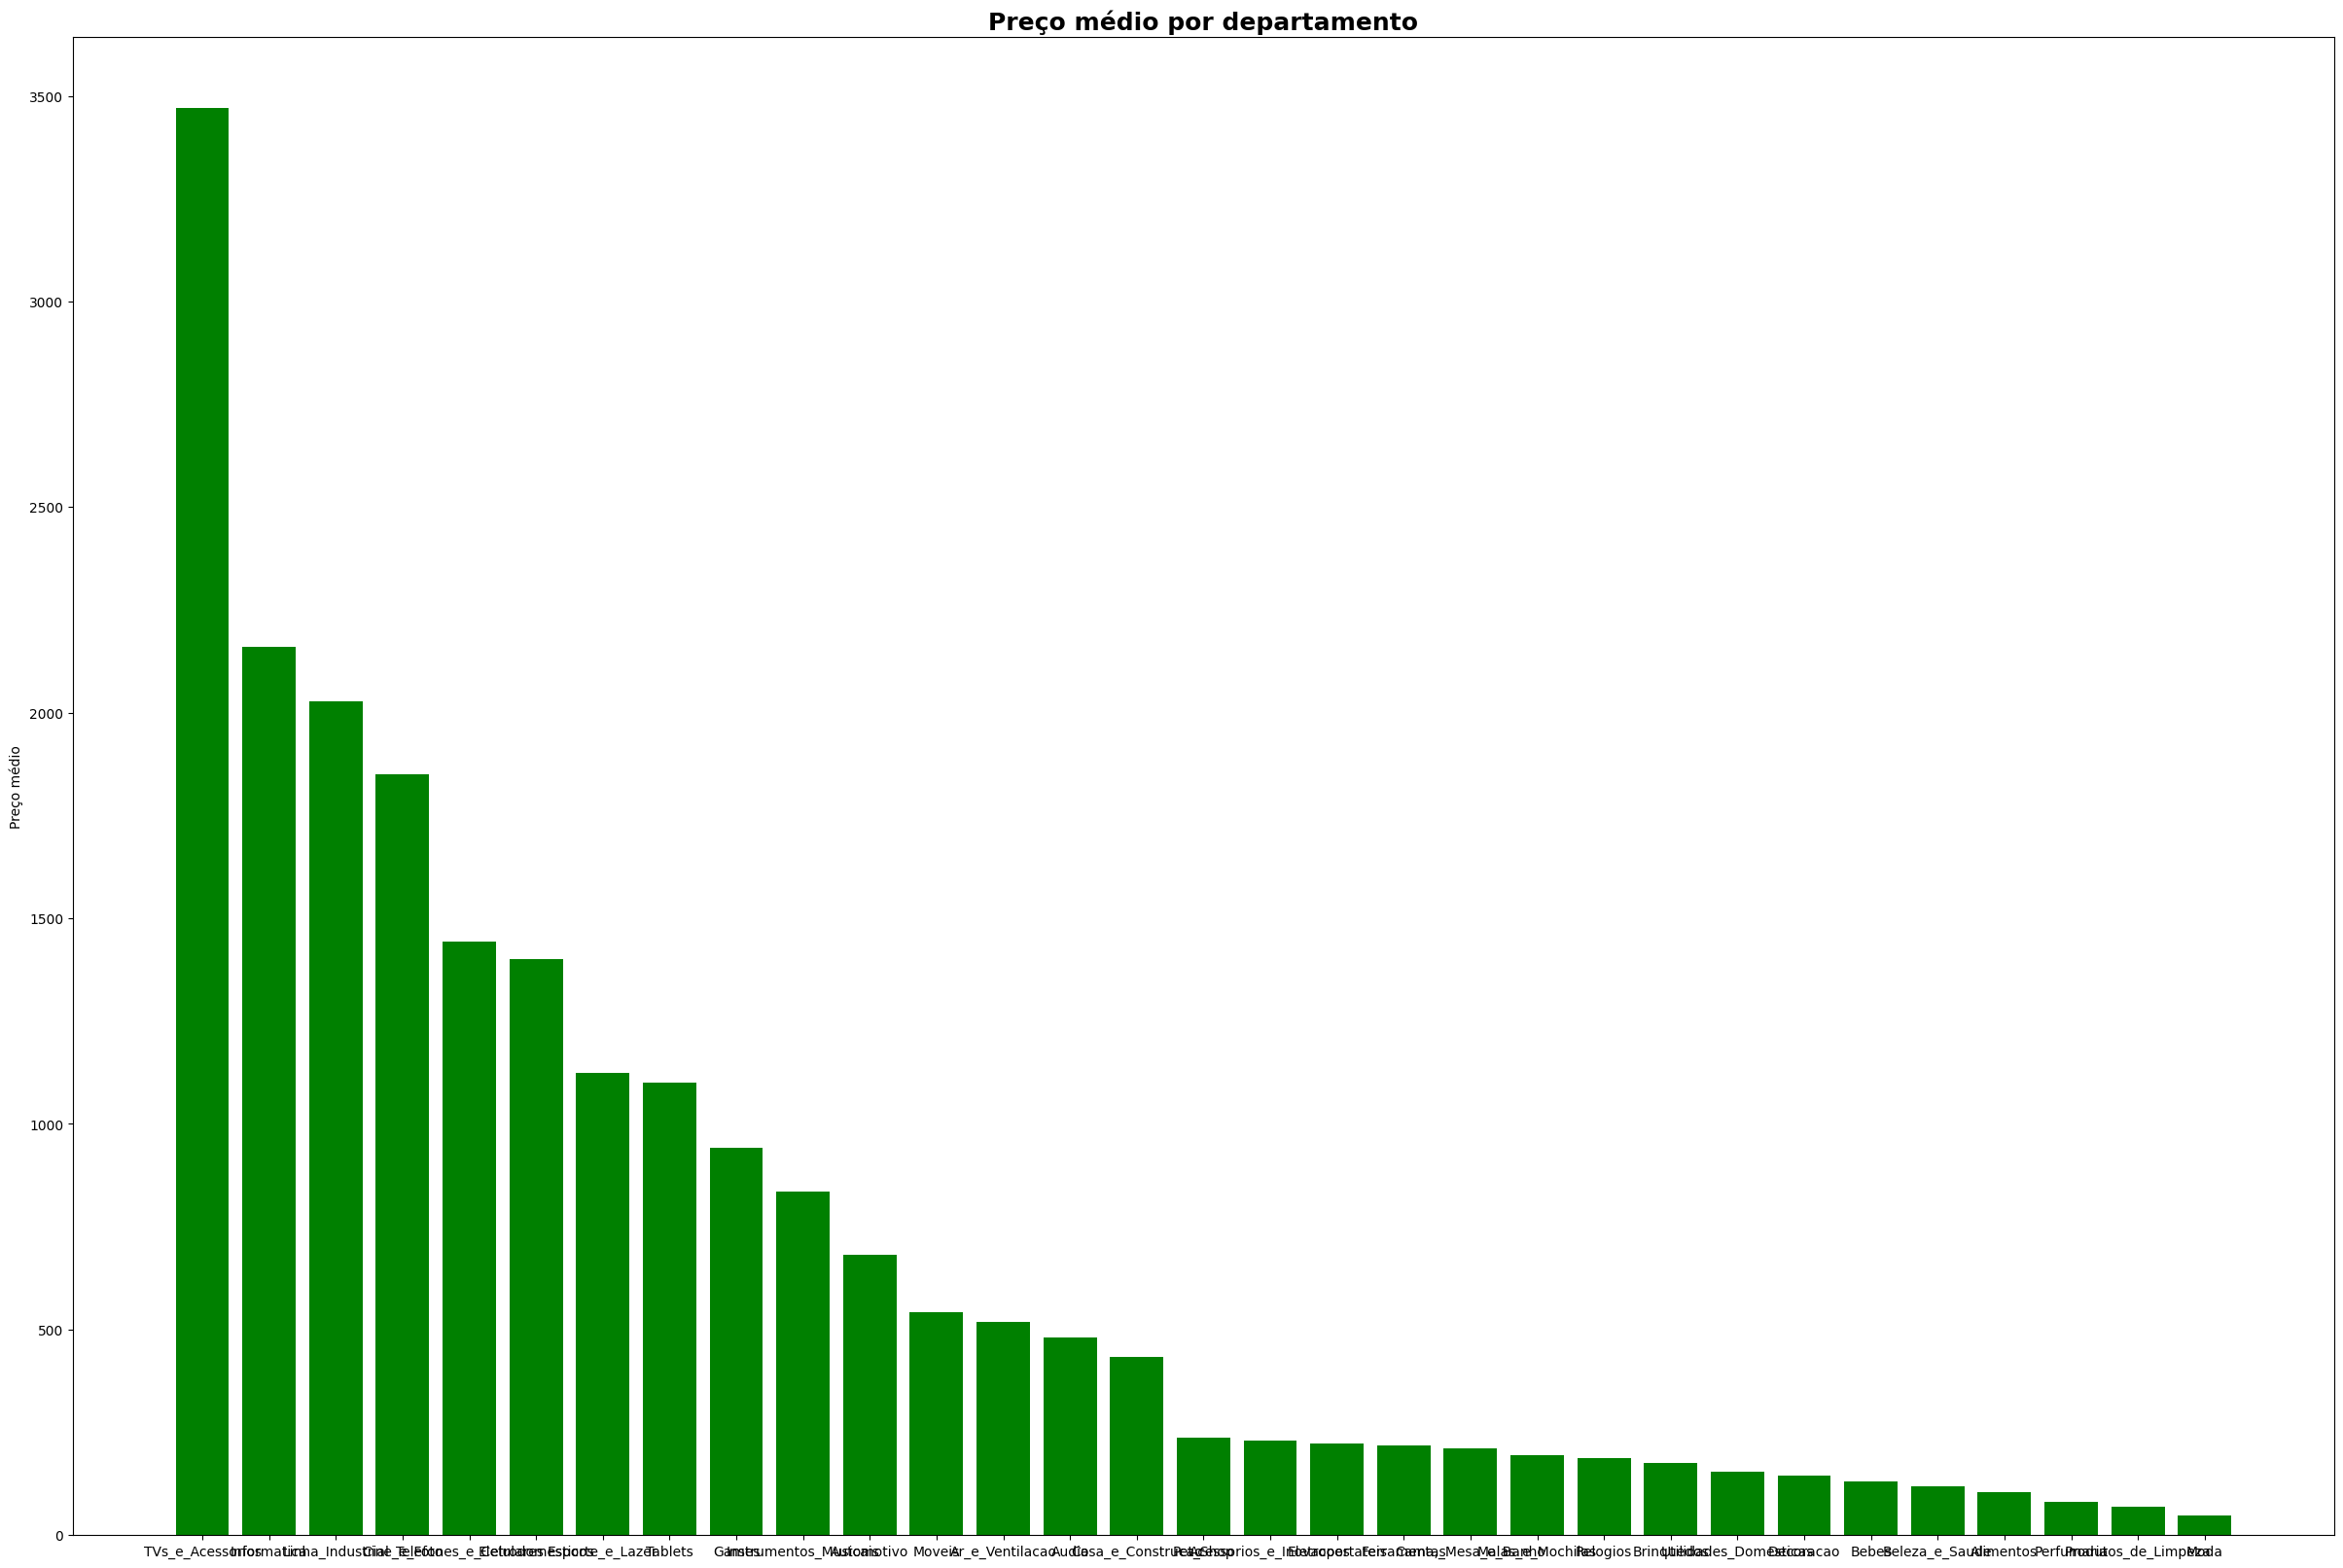

In [72]:
fig = plt.figure(figsize=(30,20))

plt.bar(agg_dept_preco["Nome_Departamento"], agg_dept_preco["Preço_com_frete"], color="green")

plt.ylabel("Preço médio")

plt.title("Preço médio por departamento", loc="center", fontsize=18, fontweight="bold", color="black");

In [73]:
#INSTALAR A BIBLIOTECA plotly - GRAF INTERATIVO
%pip install plotly
%pip install cufflinks
%pip install chart-studio

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 26.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 64.4/64.4 kB 2.4 MB/s eta 0:00:00


In [74]:
import chart_studio.plotly as py
import cufflinks as cf

import plotly.graph_objects as go
import plotly.express as px

In [75]:
px.bar(agg_idade_bandeira, x = "bandeira", y = "idade")

In [76]:
px.line(venda_por_data, x= "Data", y="idcompra")

In [77]:
agg_dept_preco

,Nome_Departamento,Preço_com_frete
0,TVs_e_Acessorios,3469.38
1,Informatica,2159.78
2,Linha_Industrial,2027.11
3,Cine_e_Foto,1851.20
4,Telefones_e_Celulares,1442.19
5,Eletrodomesticos,1400.66
6,Esporte_e_Lazer,1123.14
7,Tablets,1100.23
8,Games,942.90
9,Instrumentos_Musicais,834.61


In [78]:
px.bar(agg_dept_preco, x="Nome_Departamento", y="Preço_com_frete")